In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [13]:
# COLORS
eth1 = "#1F407A"
eth1_80 = "#385C9B"
eth1_60 = "#748DB9"
eth3 = "#1269B0"
eth4 = "#72791C"
eth5 =  "#91056A"
eth7 = "#A8322D"
eth7_60 = "#CF7E7B"

In [34]:
prediction = catalog.load("prediction_data")
helvetas = catalog.load("preprocessed_helvetas")
unlabeled = helvetas[helvetas.gebjah == 0].drop('gebjah', axis='columns')

2020-11-18 12:41:24,688 - kedro.io.data_catalog - INFO - Loading data from `prediction_data` (CSVDataSet)...
2020-11-18 12:41:24,764 - kedro.io.data_catalog - INFO - Loading data from `preprocessed_helvetas` (PickleDataSet)...


In [35]:
print(prediction.shape)
prediction.head()

(232893, 2)


adrnum       gebjah
0     115  1962.058199
1     130  1950.663465
2     154  1951.094429
3     218  1947.093576
4     245  1945.958151

In [36]:
print(helvetas.shape)

(323655, 22)


In [37]:
data_unlabeled = unlabeled.merge(prediction, on = "adrnum")
data_all = data.append(helvetas[helvetas.gebjah != 0])

In [43]:
 # Change for data_all to plot the full donors database
finaldata = data_unlabeled[["adrnum", "gebjah", "gescode"]]
# Women
f_data = finaldata[finaldata['gescode'] == "f"].copy()
f_data["gebjah"] = f_data["gebjah"].round(0) 
f_freqs = f_data['gebjah'].value_counts()
# Men
m_data = finaldata[finaldata['gescode'] == "m"].copy()
m_data["gebjah"] = m_data["gebjah"].round(0) 
m_freqs = m_data['gebjah'].value_counts()

In [44]:
print(f_data.shape)
print(f_freqs)

(115108, 3)
1959.0    4420
1958.0    4345
1960.0    4225
1957.0    4147
1961.0    4008
          ... 
1998.0       1
1926.0       1
1927.0       1
1997.0       1
1914.0       1
Name: gebjah, Length: 77, dtype: int64


In [45]:
print(m_data.shape)
print(m_freqs)

(115056, 3)
1953.0    4471
1954.0    4256
1955.0    4232
1952.0    4190
1956.0    4107
          ... 
1922.0       1
2002.0       1
1924.0       1
1928.0       1
1904.0       1
Name: gebjah, Length: 79, dtype: int64


## BUILD AGE PYRAMID

In [41]:
def get_population_pyramid(f_birth_years, female_ages, m_birth_years, male_ages, file_name):
    plt.barh(f_birth_years, female_ages, height=1.0, color = eth7, label="Female")
    plt.barh(m_birth_years, -male_ages, height=1.0, color = eth7_60, label="Male")
    plt.ylim(1900, 2020)
    plt.xlabel("# People")
    plt.ylabel("Birth Year")
    plt.axvline(x=0.0, color="black")
    plt.gca().invert_yaxis()
    xticks = plt.gca().get_xticks().astype(np.int) # Remove minus from male
    plt.xticks(xticks, labels=np.abs(xticks));
    plt.legend()
    #plt.savefig(file_name, dpi=100)

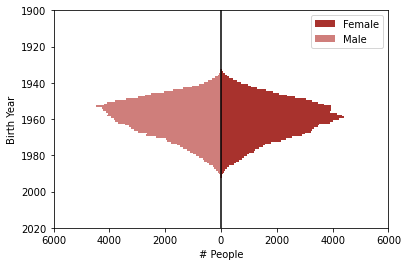

In [46]:
file_name = "pyramid_prediction.png"
get_population_pyramid(f_freqs.index, f_freqs.to_numpy(), 
                       m_freqs.index, m_freqs.to_numpy(), file_name)